In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Importing Dataset

In [304]:
df = pd.read_csv("/kaggle/input/cicids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv")

In [305]:
df.head(5)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,02/03/2018 08:47:38,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,0,539.000000,655.432936,30597.30523,113.166178,9425.666667,19069.116850,73403.0,1.0,141385.0,17673.125,23965.32327,73403.0,22.0,51417.0,8569.50000,13036.89082,31525.0,1.0,0,0,0,0,192,152,63.655975,49.510203,0,1460,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,49684,6,02/03/2018 08:47:38,281,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.000000,0.000000,135231.31670,10676.156580,140.500000,174.655375,264.0,17.0,281.0,281.000,0.00000,281.0,281.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,40,20,7117.437722,3558.718861,0,38,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,443,6,02/03/2018 08:47:40,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,0,701.800000,636.314186,41501.08640,92.915547,11192.960000,24379.448340,112589.0,1.0,279728.0,27972.800,36167.74032,112589.0,94.0,258924.0,18494.57143,36356.50372,133669.0,1.0,0,0,0,0,232,312,39.310424,53.605123,0,1460,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443,6,02/03/2018 08:47:40,132,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.00000,15151.515150,132.000000,0.000000,132.0,132.0,132.0,132.000,0.00000,132.0,132.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,40,0,15151.515150,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443,6,02/03/2018 08:47:41,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,27100.60726,80.287282,13048.380950,26311.627030,114077.0,1.0,273946.0,34243.250,37996.56546,114077.0,201.0,252994.0,21082.83333,39075.73819,135611.0,1.0,0,0,0,0,192,272,32.844797,47.442485,0,1460,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [306]:
df.shape

(1048575, 80)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  float64
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

### Label Encoding `Label` attribute

In [308]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Label"] = le.fit_transform(df["Label"])

In [309]:
df["Label"].value_counts()

Label
0    762384
1    286191
Name: count, dtype: int64

### Dealing with`Timestamp` attribute

In [310]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
df["Timestamp"].value_counts()

Timestamp
02/03/2018 10:08:06    362
02/03/2018 10:47:58    346
02/03/2018 09:27:28    342
02/03/2018 08:57:55    335
02/03/2018 11:28:57    330
                      ... 
02/03/2018 05:30:16      1
02/03/2018 05:30:15      1
02/03/2018 08:46:33      1
02/03/2018 03:55:04      1
02/03/2018 10:29:26      1
Name: count, Length: 31425, dtype: int64

In [311]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Dst Port           1048575 non-null  int64         
 1   Protocol           1048575 non-null  int64         
 2   Timestamp          1048575 non-null  datetime64[ns]
 3   Flow Duration      1048575 non-null  int64         
 4   Tot Fwd Pkts       1048575 non-null  int64         
 5   Tot Bwd Pkts       1048575 non-null  int64         
 6   TotLen Fwd Pkts    1048575 non-null  int64         
 7   TotLen Bwd Pkts    1048575 non-null  float64       
 8   Fwd Pkt Len Max    1048575 non-null  int64         
 9   Fwd Pkt Len Min    1048575 non-null  int64         
 10  Fwd Pkt Len Mean   1048575 non-null  float64       
 11  Fwd Pkt Len Std    1048575 non-null  float64       
 12  Bwd Pkt Len Max    1048575 non-null  int64         
 13  Bwd Pkt Len Min    1048575 

In [313]:
df["Timestamp"].head(10)

0   2018-02-03 08:47:38
1   2018-02-03 08:47:38
2   2018-02-03 08:47:40
3   2018-02-03 08:47:40
4   2018-02-03 08:47:41
5   2018-02-03 08:47:41
6   2018-02-03 08:47:41
7   2018-02-03 08:47:46
8   2018-02-03 08:48:17
9   2018-02-03 08:48:17
Name: Timestamp, dtype: datetime64[ns]

In [314]:
df["time"] = df["Timestamp"].dt.hour * 3600 + df["Timestamp"].dt.minute * 60 + df["Timestamp"].dt.second

In [315]:
df["time"].head(10)

0    31658
1    31658
2    31660
3    31660
4    31661
5    31661
6    31661
7    31666
8    31697
9    31697
Name: time, dtype: int64

In [316]:
df = df.drop(columns=['Timestamp'],axis = 1)

In [317]:
df.head(5)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,time
0,443,6,141385,9,7,553,3773.0,202,0,61.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31658
1,49684,6,281,2,1,38,0.0,38,0,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31658
2,443,6,279824,11,15,1086,10527.0,385,0,98.727273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31660
3,443,6,132,2,0,0,0.0,0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31660
4,443,6,274016,9,13,1285,6141.0,517,0,142.777778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31661


In [318]:
df["time"].dtype

dtype('int64')

In [319]:
df.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

### Dealing with `np.inf` and `np.nan` values

In [320]:
np.isinf(df).values.sum()

5542

In [321]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [322]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.isna().sum()

Dst Port                0
Protocol                0
Flow Duration           0
Tot Fwd Pkts            0
Tot Bwd Pkts            0
TotLen Fwd Pkts         0
TotLen Bwd Pkts         0
Fwd Pkt Len Max         0
Fwd Pkt Len Min         0
Fwd Pkt Len Mean        0
Fwd Pkt Len Std         0
Bwd Pkt Len Max         0
Bwd Pkt Len Min         0
Bwd Pkt Len Mean        0
Bwd Pkt Len Std         0
Flow Byts/s          4050
Flow Pkts/s          4050
Flow IAT Mean           0
Flow IAT Std            0
Flow IAT Max            0
Flow IAT Min            0
Fwd IAT Tot             0
Fwd IAT Mean            0
Fwd IAT Std             0
Fwd IAT Max             0
Fwd IAT Min             0
Bwd IAT Tot             0
Bwd IAT Mean            0
Bwd IAT Std             0
Bwd IAT Max             0
Bwd IAT Min             0
Fwd PSH Flags           0
Bwd PSH Flags           0
Fwd URG Flags           0
Bwd URG Flags           0
Fwd Header Len          0
Bwd Header Len          0
Fwd Pkts/s              0
Bwd Pkts/s  

In [323]:
df = df.dropna()

### Get the count for each column

In [324]:
df.columns.shape

(80,)

In [325]:
df.columns[1]

'Protocol'

In [326]:
print(df[df.columns[1]].value_counts())

Protocol
6     828442
17    202701
0      13382
Name: count, dtype: int64


In [327]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
for i in range(df.columns.shape[0]):
    print(df[df.columns[i]].value_counts())
    print("\n\n")

Dst Port
8080     281637
53       192905
3389     177448
80       110411
443       94606
          ...  
4885          1
27247         1
47274         1
36475         1
3846          1
Name: count, Length: 37271, dtype: int64



Protocol
6     828442
17    202701
0      13382
Name: count, dtype: int64



Flow Duration
1           6269
491         1871
490         1800
492         1777
486         1762
            ... 
454545         1
2178352        1
11997881       1
1663425        1
3972651        1
Name: count, Length: 442343, dtype: int64



Tot Fwd Pkts
2       326651
3       220511
1       185802
8        91734
9        34297
         ...  
2169         1
2887         1
3123         1
710          1
2910         1
Name: count, Length: 754, dtype: int64



Tot Bwd Pkts
0       313636
1       218927
4       186154
7       117775
2        46141
         ...  
1611         1
3749         1
1791         1
1897         1
648          1
Name: count, Length: 1064, dtype: int64



TotLen 

In [328]:
df.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [329]:
columns_preserved = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts',  'Fwd Pkt Len Std',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Std', 'Fwd IAT Std', 'Bwd IAT Std', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s','Bwd Pkts/s', 
       'Pkt Len Std', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Std', 'Idle Std', 'Label',
       'time']

df = df[columns_preserved]

In [330]:
len(columns_preserved)

53

### Remove all the columns that has only `0s`

In [331]:
zero_columns = df.columns[(df == 0).all()]
zero_columns

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg'],
      dtype='object')

In [332]:
df.drop(zero_columns, axis=1, inplace=True)

In [333]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Byts/s,...,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Std,Idle Std,Label,time
0,443,6,141385,9,7,553,3773.0,87.534438,655.432936,30597.30523,...,7,3773,8192,119,4,20,0.0,0.0,0,31658
1,49684,6,281,2,1,38,0.0,26.870058,0.000000,135231.31670,...,1,0,123,0,0,20,0.0,0.0,0,31658
2,443,6,279824,11,15,1086,10527.0,129.392497,636.314186,41501.08640,...,15,10527,8192,1047,5,20,0.0,0.0,0,31660
3,443,6,132,2,0,0,0.0,0.000000,0.000000,0.00000,...,0,0,256,-1,0,20,0.0,0.0,0,31660
4,443,6,274016,9,13,1285,6141.0,183.887722,611.180489,27100.60726,...,13,6141,8192,1047,5,20,0.0,0.0,0,31661


In [334]:
df.shape

(1044525, 43)

<Axes: >

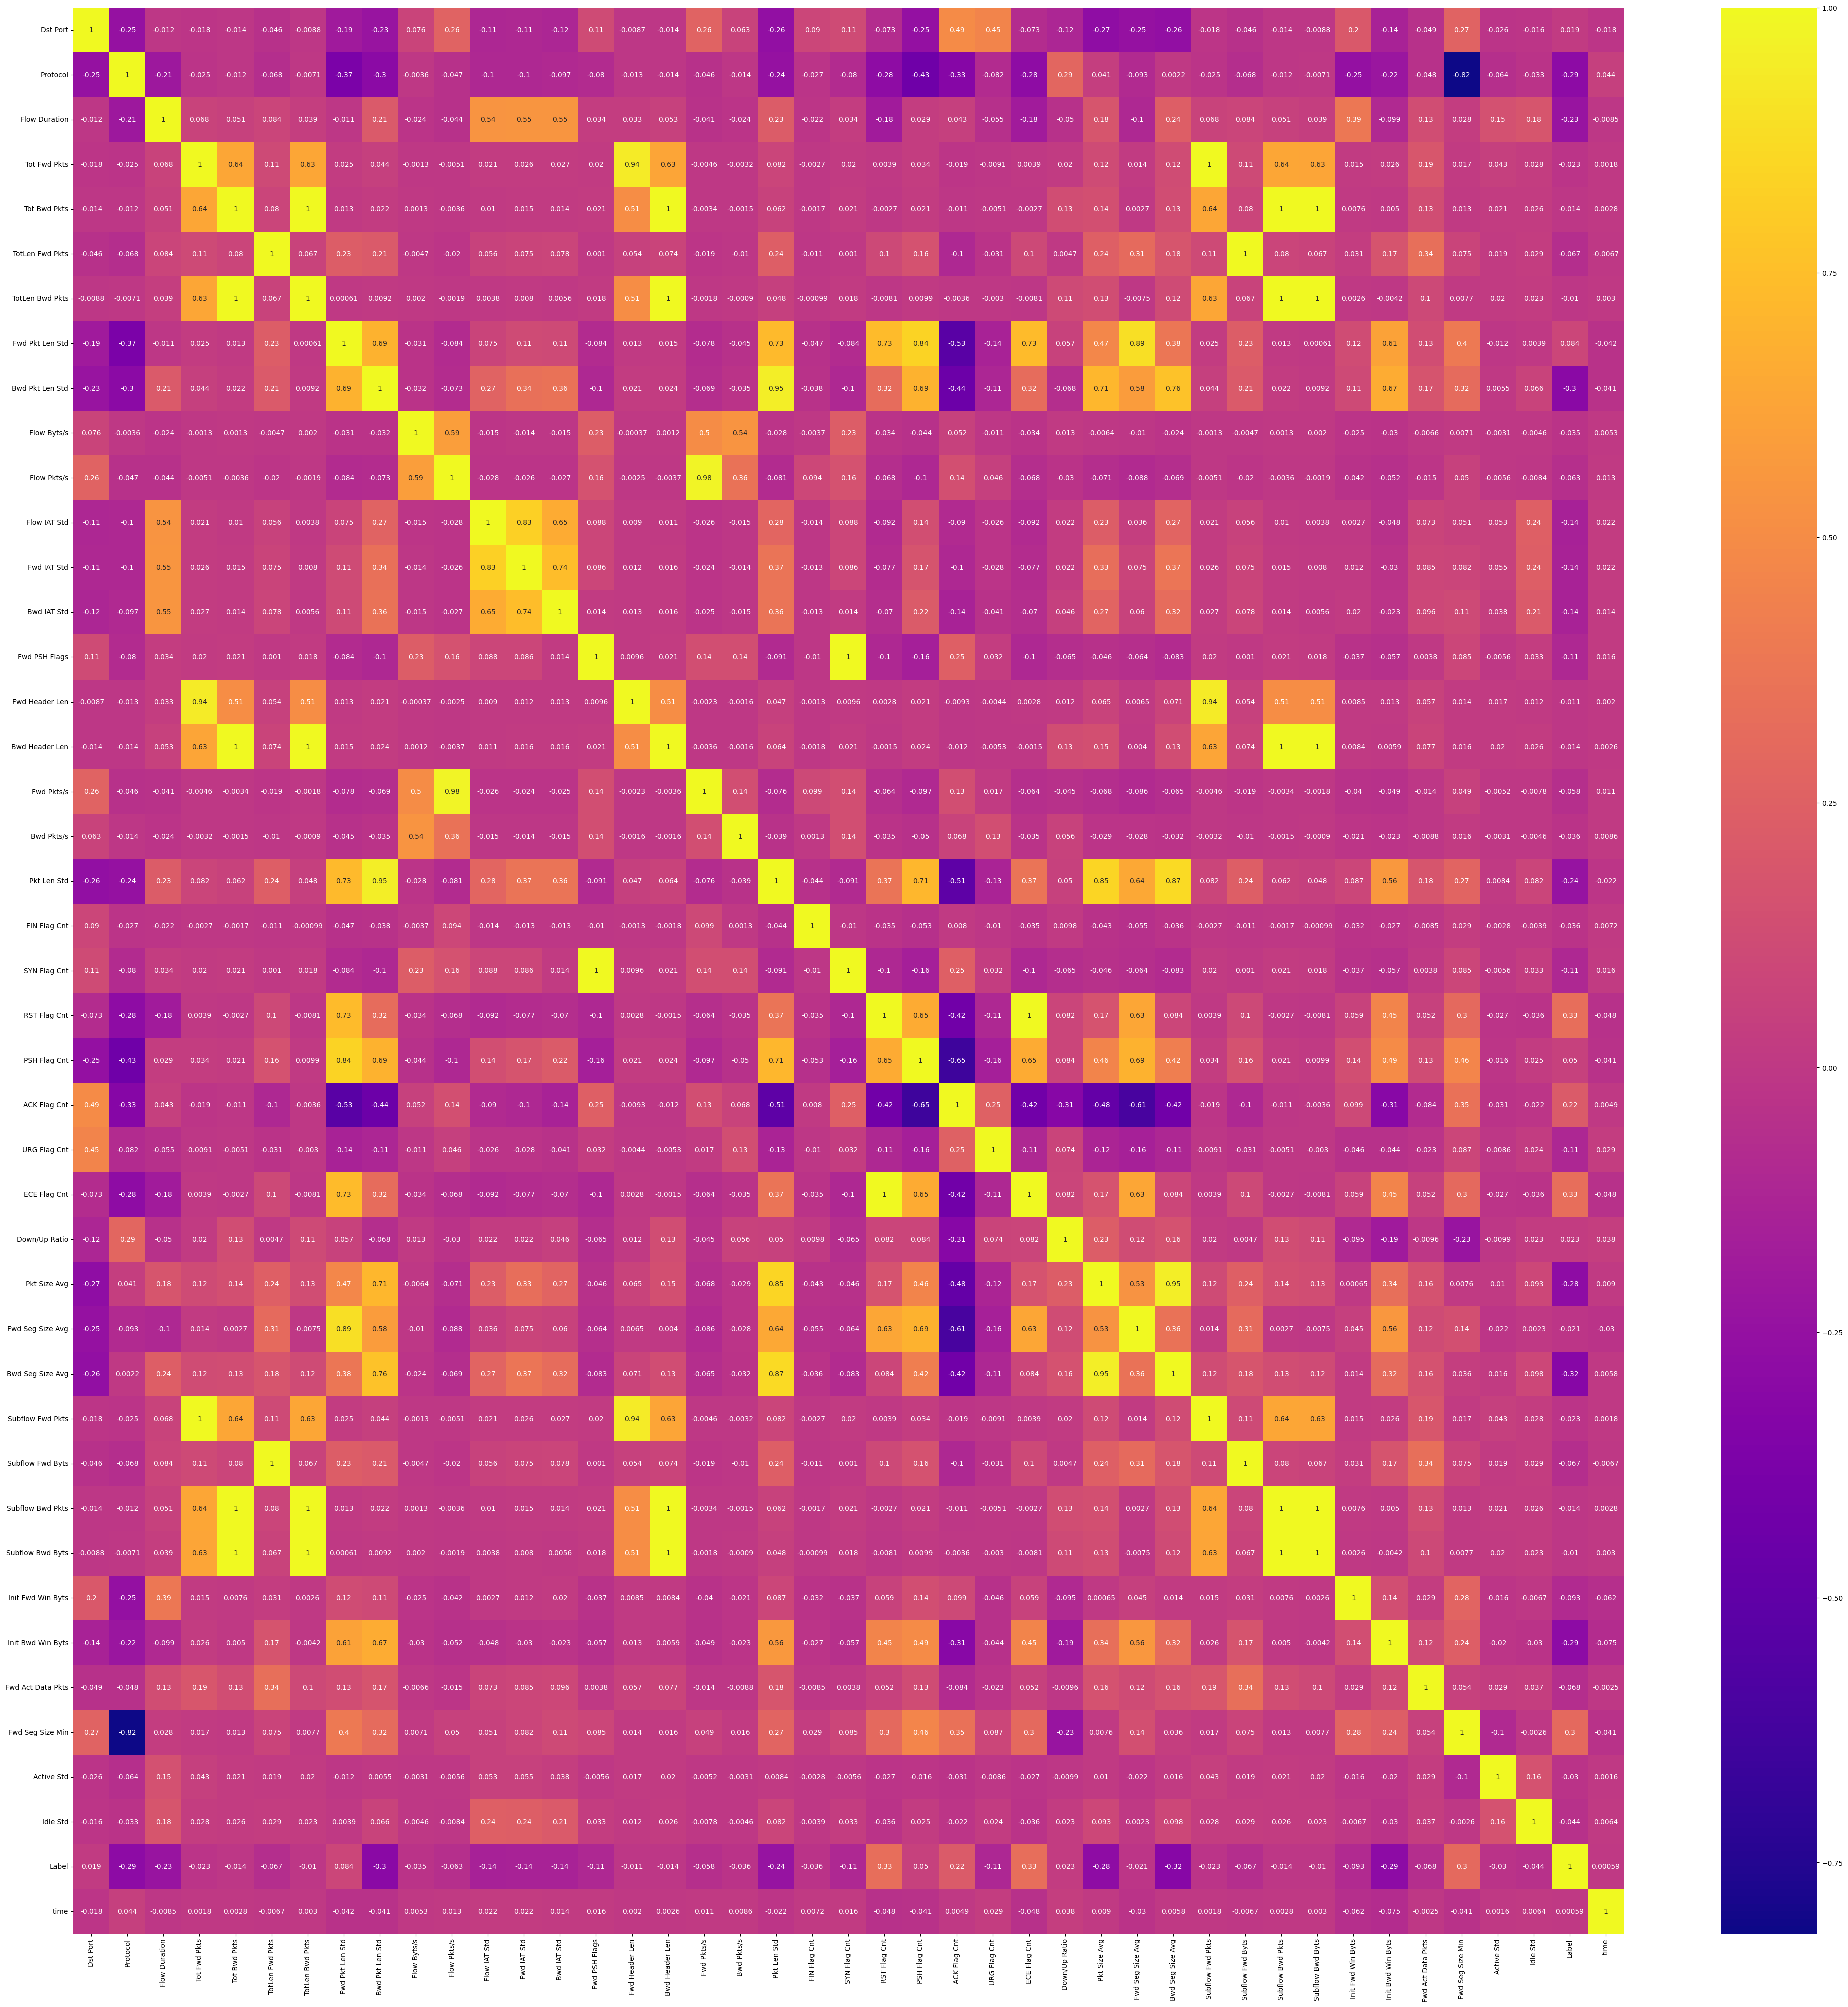

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(data = df.corr(), cmap="plasma", annot = True)

### Getting the range of values for each column

In [336]:
for i in range(df.columns.shape[0]):
    print(df.columns[i], "Min:",df[df.columns[i]].min(), "Max:",df[df.columns[i]].max())

Dst Port Min: 0 Max: 65534
Protocol Min: 0 Max: 17
Flow Duration Min: 1 Max: 119999997
Tot Fwd Pkts Min: 1 Max: 43159
Tot Bwd Pkts Min: 0 Max: 69241
TotLen Fwd Pkts Min: 0 Max: 1100627
TotLen Bwd Pkts Min: 0.0 Max: 101000000.0
Fwd Pkt Len Std Min: 0.0 Max: 1032.375901
Bwd Pkt Len Std Min: 0.0 Max: 1032.375901
Flow Byts/s Min: 0.0 Max: 480000000.0
Flow Pkts/s Min: 0.016669395 Max: 3000000.0
Flow IAT Std Min: 0.0 Max: 84500000.0
Fwd IAT Std Min: 0.0 Max: 84700000.0
Bwd IAT Std Min: 0.0 Max: 84800000.0
Fwd PSH Flags Min: 0 Max: 1
Fwd Header Len Min: 0 Max: 2275036
Bwd Header Len Min: 0 Max: 1384832
Fwd Pkts/s Min: 0.008566567 Max: 3000000.0
Bwd Pkts/s Min: 0.0 Max: 2000000.0
Pkt Len Std Min: 0.0 Max: 842.931393
FIN Flag Cnt Min: 0 Max: 1
SYN Flag Cnt Min: 0 Max: 1
RST Flag Cnt Min: 0 Max: 1
PSH Flag Cnt Min: 0 Max: 1
ACK Flag Cnt Min: 0 Max: 1
URG Flag Cnt Min: 0 Max: 1
ECE Flag Cnt Min: 0 Max: 1
Down/Up Ratio Min: 0 Max: 148
Pkt Size Avg Min: 0.0 Max: 1687.5
Fwd Seg Size Avg Min: 0.0 Max

### Splitting into dependent and independent variables

In [337]:
X = df.drop(columns=["Label"], axis=1)
y = df["Label"]

In [338]:
X.shape, y.shape

((1044525, 42), (1044525,))

In [339]:
X.head(5)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,Bwd Pkt Len Std,Flow Byts/s,...,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Std,Idle Std,time
0,443,6,141385,9,7,553,3773.0,87.534438,655.432936,30597.30523,...,553,7,3773,8192,119,4,20,0.0,0.0,31658
1,49684,6,281,2,1,38,0.0,26.870058,0.000000,135231.31670,...,38,1,0,123,0,0,20,0.0,0.0,31658
2,443,6,279824,11,15,1086,10527.0,129.392497,636.314186,41501.08640,...,1086,15,10527,8192,1047,5,20,0.0,0.0,31660
3,443,6,132,2,0,0,0.0,0.000000,0.000000,0.00000,...,0,0,0,256,-1,0,20,0.0,0.0,31660
4,443,6,274016,9,13,1285,6141.0,183.887722,611.180489,27100.60726,...,1285,13,6141,8192,1047,5,20,0.0,0.0,31661


In [340]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

### Splitting into Training and testing set

In [341]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [342]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(731167, 42)
(731167,)
(313358, 42)
(313358,)


### Applying Feature Scaling

In [366]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Applying decision tree classification algorithm

In [369]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train_std, y_train)

In [370]:
y_pred = clf.predict(X_test_std)
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [371]:
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 11


In [372]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 1.000


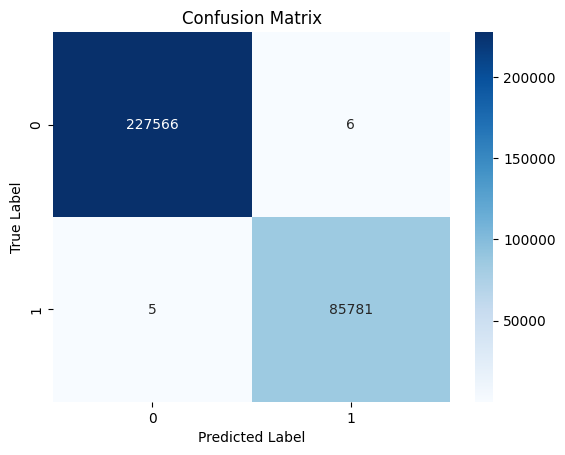

In [376]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

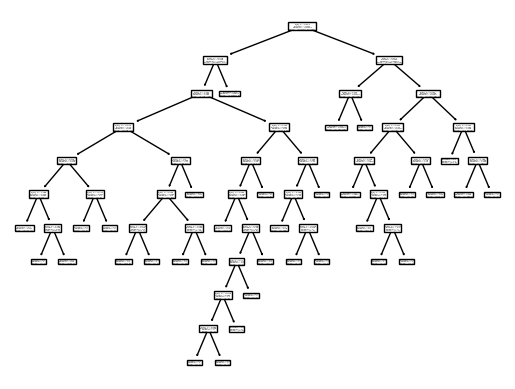

In [374]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()